# Chap2: An Asset Selling Problem

The chapter to answer basic question: **When to sell an asset** 

In this case, we use a simple class of policies known as:  *policy function approximations*.

**Mathematical Model**

* **State Variable**: $S_t$ that captures all the information we need ...($R_t$, $I_t$, $B_t$)
* **Decsion Variable** : $x_t$ where $x_0$ is the design decision, while $x_t$ for t>0 represents control varilables.
* **Exogenous Information**: The variable $W_t$ captures information that first becomes available between $t-1$ and $t$ from outside of our system.
* **Transition Fucntion**:
$$
S_{t+1} = S^M(S_t, x_t,W_{t+1})
$$
* **Objective Function**: When there are elements of the *problem* that depend on the state variables, we represent costs/contribution as:

$$
C(S_{t},x_{t}) \ or \ C(S_t,x_t, W_{t+1})
$$

**Set of learning problems** : where we are trying to learn about a function which is not itself a function of state variable, it means:

This means the state variable consists purely of belief state $B_t$.

## Narrative

We are holding a block of shares of stock, looking for oppurtunity to sell.If we sell at time t, we receive a price that varies according to some random process over time. Once we sell the stock, the process stops.

## Basic Model

### State Variable:

Two state variables:
* The **Physical State** which says whether or not we are still holding the assest
* The **Information State** the price of stock 

* The physical State:

$$
  R_t=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if we are holding the stock at time t}\  \\
    0, & \text{if we are not longer holding the stock at time t}
  \end{array}\right. 
$$

If we sell the stock, we receive the price per share $p_t$. This means our state variable is:
$$
S_t=(R_t, p_t)
$$

### Decision Variable:

$$
\begin{equation}
  x_t=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if we sell the stock at time t}\  \\
    0, & \text{if we do not sell the stock at time t}
  \end{array}\right.
\end{equation} 
$$
we only can sell stock if we hold it,
$$
x_t < R_t
$$

#### Policy:

What is the policy: <br> **which is going to define how we make decision**

$$
X^{\pi}(S_t)
$$

Example policy is we might be to sell if the price drops the below some limit point, thus we could write:

$$
\begin{equation}
  X^{sell-low}(S_t|\theta^{low})=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ p_t<\theta^{low}  \ \text{and}\ R_t=1  \\
    1, & \text{if}\ t= T\ \text{and} \ R_t = 1 \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation} 
$$

### Exogenous Function

The only random process in our basic model is the change in price. Alternatively, naturally we simply write $W_t$ be the new price, in which we would write:

$$
W_{t+1} = (p_{t+1})
$$

### Transition Function

Is the equation that describe how the states evolves. The transition equation is:

$$
R_{t+1} = R_{t} - x_{t}
$$

How the price evolves over time. 

$$p_{t+1} = p_t  + \hat{p}_{t+1}$$

**Transition Function**

$$
S_{t+1} = S^M(S_t, X^{\pi}(S_t), W_{t+1})
$$

If we use our policy $X^{\pi}(S_t)$, and if we choose sample path $\omega$, that determine the sequence $W_1,W_2,W_3,...,W_T$...than the simulation of process can be written as:

$$
(S_0,x_0 = X^{\pi}(S_0)), W_1(\omega), S_1, x_1 = X^{\pi}(S_1), W_(\omega),..., x_{T-1}, W_T(\omega),S_T)
$$

### Objective Function
The performance metric is how much we earn from selling our stock.

$$
C(S_t,x_t) = p_tx_t
$$

We now can formulate the optimizatio problem:

$$
max \ \sum_{t=0}^{T-1} p_tx_t \\
x_0,x_1,...,x_{T-1}
$$

Constraints of the Optimization:

$$
\sum_{t=0}^{T-1} x_t = 1, \\
x_t \leq 1, \\
x_t \geq 0,
$$

**Including Uncertainty**:

We are simulating a policy following a sample path $\omega$ of price $p_1(\omega), p_2(\omega),...$

$$
S_{t+1}(\omega) = S^{M}(S_t(\omega), X^{\pi}(S_t(\omega)), W_{t+1}(\omega))
$$

If we follow policy $\pi$ along this sample path, we can compute the performance:

$$
\hat{F}^{\pi}(\omega) = \sum_{t=0}^{T-1} p_t(\omega)X^{\pi}(S_t(\omega))
$$

This is for one sample path . We can simulate over sample of $N$ sampels ($\omega^{1},...,\omega^n,...\omega^N$), and take average:

$$
\overline{F}^{\pi} = \frac{1}{N} \sum_{n=1}^{N}\hat{F}^{\pi}(\omega^n)
$$

Finally, we write out optimization problem in terms of finding the best policy, which we can write:

$$
max \ \ \overline{F}^{\pi} \\
x \in \Pi
$$

## Designing Policy

### Sell_low Policy:
In this policy we *sell* at that the price lower than, $\theta^{sell-low}$.

$$
  X^{sell-low}(S_t|\theta^{low}) =\left\{
  \begin{array}{@{}ll@{}}
    1  & if \ p_t < \theta^{low} \ and \ R_t=1  \\
    1, & t=T \ R_t=1 \\
    0, & otherwise
  \end{array}\right.
$$

### High_Low policy:

In this policy , we will sell the asset if the price jumps *too high** or ** too low**:

$$
  X^{high-low}(S_t|\theta^{high-low}) =\left\{
  \begin{array}{@{}ll@{}}
    1  & if \ p_t < \theta^{low} \ or \ p_t > \theta^{high}   \\
    1, & t=T \ and \ R_t=1 \\
    0, & otherwise
  \end{array}\right.
$$

### Track Policy:

Perhaps we just want to sell when the stock rises above a tracking signal. Tod this, first create a smoothed estimate of price:

$$\overline{p}_t = (1- \alpha)\overline{p}_{t-1} + \alpha \hat{p}_t$$

Now consider a tracking policy that we might write:

$$
  X^{track}(S_t | \theta^{track}) =\left\{
  \begin{array}{@{}ll@{}}
    1  & if \ p_t > \overline{p}_t + \theta^{track} \    \\
    1, & t=T \ and \ R_t=1 \\
    0, & otherwise
  \end{array}\right.
$$

For this policy, we are going to need to tweak our model, because we now $\overline{p}_{t}$ in order to make decision. This means we would now write our state as:

$$
S_t = (R_t, p_t, \overline{p}_t)
$$

**Classes of Policies**:

$F = \{"sell-low","high-low","track"\}$

**Parameter for each policy**:

$\theta^f \in F$

**Search over policies**:

$\pi \in \Pi$

## Coding Part:

### Import libraries

In [55]:
import pandas as pd
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt
from copy import copy
import math
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

### Change the directory to to get module

In [56]:
import os
os.chdir("/home/peyman/Documents/PhD_UiS/seqdec_powell_repo/Chap2_Assett_Selling/function")
os.getcwd()

'/home/peyman/Documents/PhD_UiS/seqdec_powell_repo/Chap2_Assett_Selling/function'

### Import modules from function

In [57]:
from AssetSellingModel import AssetSellingModel
from AssetSellingPolicy import AssetSellingPolicy

### Change the directory to to get parameters

In [58]:
import os
os.chdir("/home/peyman/Documents/PhD_UiS/seqdec_powell_repo/Chap2_Assett_Selling/data")
os.getcwd()

'/home/peyman/Documents/PhD_UiS/seqdec_powell_repo/Chap2_Assett_Selling/data'

### Policy Parameters:

In [59]:
sheet1= pd.read_excel("asset_selling_policy_parameters_edit.xlsx", sheet_name="Sheet1", usecols=["policy", "param1","param2"])

In [60]:
sheet1

,policy,param1,param2
0,sell_low,2,NaN
1,high_low,4,10.0
2,track,0,4.0


In [61]:
params = zip(sheet1["param1"], sheet1["param2"])
param_list = list(params)
param_list

[(2, nan), (4, 10.0), (0, 4.0)]

### Full grid Policy Parameters:

In [62]:
sheet2 = pd.read_excel("asset_selling_policy_parameters_edit.xlsx", sheet_name="Sheet2")

In [86]:
sheet2.dtypes

low_min             int64
low_max             int64
high_min            int64
high_max            int64
increment_size    float64
dtype: object

In [85]:
dtype(sheet2)

NameError: name 'dtype' is not defined

### Parameters of the Dynamic Model: 

In [64]:
sheet3 = pd.read_excel("asset_selling_policy_parameters_edit.xlsx", sheet_name="Sheet3")
sheet3

,Policy,TimeHorizon,DiscountFactor,InitialPrice,InitialBias,UpStep,DownStep,Variance,Iterations,PrintStep
0,track,40,0.99,16,Up,1,-1,2,10,40


### Bias Term:

In [65]:
biasdf = pd.read_excel("asset_selling_policy_parameters_edit.xlsx", sheet_name="Sheet4")
biasdf_edit=biasdf.set_index('additional')
biasdf_edit

,Up,Neutral,Down
additional,,,
Up,0.9,0.1,0.0
Neutral,0.2,0.6,0.2
Down,0.0,0.1,0.9


### Track Policy:

In [66]:
policy_selected = sheet3['Policy'][0]
print("The selected policy is: {}".format(policy_selected))

T = sheet3['TimeHorizon'][0]
print("The T value is: {}".format(T))

initPrice = sheet3['InitialPrice'][0]
print("The initial price is: {}".format(initPrice))

initBias = sheet3['InitialBias'][0]
print("The initial Bias is: {}".format(initBias))    

exog_params = {'UpStep':sheet3['UpStep'][0],'DownStep':sheet3['DownStep'][0],'Variance':sheet3['Variance'][0],'biasdf'
               :biasdf_edit}
print("The exog_params is: {}".format(exog_params))    
    
nIterations = sheet3['Iterations'][0]
print("The nIteration is: {}".format(nIterations))    

printStep = sheet3['PrintStep'][0]
print("The printStep is: {}".format(printStep))    

printIterations = [0]
print("The printIterations is: {}".format(printIterations))    

printIterations.extend(list(reversed(range(nIterations-1,0,-printStep))))

The selected policy is: track
The T value is: 40
The initial price is: 16
The initial Bias is: Up
The exog_params is: {'UpStep': 1, 'DownStep': -1, 'Variance': 2, 'biasdf':              Up  Neutral  Down
additional                    
Up          0.9      0.1   0.0
Neutral     0.2      0.6   0.2
Down        0.0      0.1   0.9}
The nIteration is: 10
The printStep is: 40
The printIterations is: [0]


In [67]:
policy_names = ['sell_low', 'high_low', 'track']
print("policy_names are: {}".format(policy_names))    

state_names = ['price', 'resource','bias']
print("state_names are: {}".format(state_names))    

init_state = {'price': initPrice, 'resource': 1,'bias':initBias}
print("init_state are: {}".format(init_state))    

decision_names = ['sell', 'hold']
print("decision_names are: {}".format(decision_names))    


policy_names are: ['sell_low', 'high_low', 'track']
state_names are: ['price', 'resource', 'bias']
init_state are: {'price': 16, 'resource': 1, 'bias': 'Up'}
decision_names are: ['sell', 'hold']


In [68]:
biasdf = exog_params["biasdf"]
print("the biasdf_edit is \n .{}".format(biasdf))
print(type(biasdf))
biasdf= biasdf.cumsum(axis =1)
print("the biasdf_edit is \n .{}".format(biasdf))


the biasdf_edit is 
 .             Up  Neutral  Down
additional                    
Up          0.9      0.1   0.0
Neutral     0.2      0.6   0.2
Down        0.0      0.1   0.9
<class 'pandas.core.frame.DataFrame'>
the biasdf_edit is 
 .             Up  Neutral  Down
additional                    
Up          0.9      1.0   1.0
Neutral     0.2      0.8   1.0
Down        0.0      0.1   1.0


In [69]:
M = AssetSellingModel(state_names, decision_names, init_state,exog_params,T)

In [70]:
P = AssetSellingPolicy(M, policy_names)

### Policy Evaluation

In [71]:
t = 0
prev_price = init_state['price']

In [72]:
policy_info = {'sell_low': param_list[0],
                   'high_low': param_list[1],
                   'track': param_list[2] + (prev_price,)}

In [73]:
policy_info

{'sell_low': (2, nan), 'high_low': (4, 10.0), 'track': (0, 4.0, 16)}

In [74]:
policy_selected

'track'

In [75]:
#if (not policy_selected =='full_grid'):
print("Selected policy {}, time horizon {}, initial price {} and number of iterations {}".format(policy_selected,T,initPrice,nIterations))
contribution_iterations=[P.run_policy(param_list, policy_info, policy_selected, t) for ite in list(range(nIterations))]

contribution_iterations = pd.Series(contribution_iterations)
print("Contribution per iteration: ")
print(contribution_iterations)
cum_avg_contrib = contribution_iterations.expanding().mean()
print("Cumulative average contribution per iteration: ")
print(cum_avg_contrib)
        
#plotting the results

#fig, axsubs = plt.subplots(1,2,sharex=True,sharey=True)
#fig.suptitle("Asset selling using policy {} with parameters {} and T {}".format(policy_selected,policy_info[policy_selected],T) )
#i = np.arange(0, nIterations, 1)
        
#axsubs[0].plot(i, cum_avg_contrib, 'g')
#axsubs[0].set_title('Cumulative average contribution')
          
#axsubs[1].plot(i, contribution_iterations, 'g')
#axsubs[1].set_title('Contribution per iteration')
        
    
# Create a big subplot
#ax = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

#ax.set_ylabel('USD', labelpad=0) # Use argument `labelpad` to move label downwards.
#ax.set_xlabel('Iterations', labelpad=10)
        
#plt.show()        


Selected policy track, time horizon 40, initial price 16 and number of iterations 10
time=0, obj=0.0, s.resource=1, s.price=16, x=Decision(sell=0, hold=1)
coin  0.4139840589481404  curr_bias  Up  new_bias  Up
smoothed_price = 19.275851851363697
time=1, obj=0.0, s.resource=1, s.price=16.818962962840924, x=Decision(sell=0, hold=1)
coin  0.8487800961190239  curr_bias  Up  new_bias  Up
smoothed_price = 12.919965111987779
time=2, obj=0.0, s.resource=1, s.price=15.844213500127637, x=Decision(sell=1, hold=0)
coin  0.45203620488154816  curr_bias  Up  new_bias  Up
obj=15.844213500127637, state.resource=0
time=0, obj=0.0, s.resource=1, s.price=16, x=Decision(sell=0, hold=1)
coin  0.2720800519673423  curr_bias  Up  new_bias  Up
smoothed_price = 29.300677434463253
time=1, obj=0.0, s.resource=1, s.price=19.325169358615813, x=Decision(sell=0, hold=1)
coin  0.905534061916374  curr_bias  Up  new_bias  Neutral
smoothed_price = 11.678950072957633
time=2, obj=0.0, s.resource=1, s.price=17.41361453720127,

## Plot Results

<AxesSubplot:xlabel='iteration_number', ylabel='contribution_iterations'>

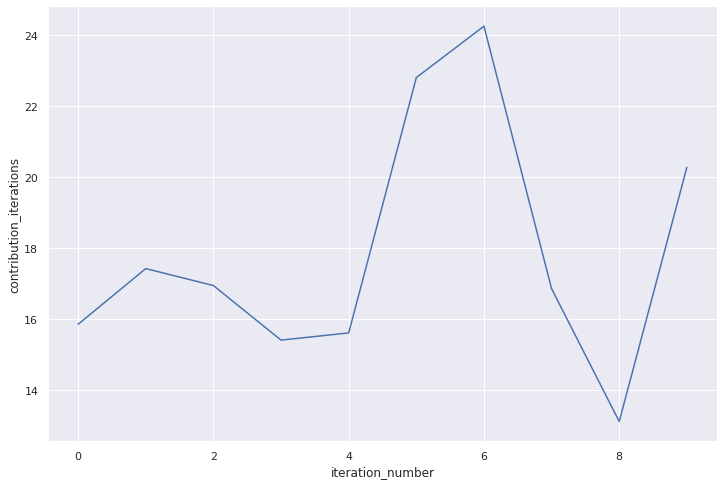

In [76]:
df_cont_per_ite = pd.DataFrame({"iteration_number": list(range(nIterations)), "contribution_iterations":contribution_iterations})
sns.lineplot(data=df_cont_per_ite, x= "iteration_number", y="contribution_iterations")

## Full grid Search

In [77]:
policy_selected =='full_grid'
# obtain the theta values to carry out a full grid search
grid_search_theta_values = P.grid_search_theta_values(sheet2['low_min'], sheet2['low_max'], sheet2['high_min'], sheet2['high_max'], sheet2['increment_size'])
# use those theta values to calculate corresponding contribution values

In [78]:
len(grid_search_theta_values[0])

25

In [79]:
%%capture
policy_selected =='full_grid'
# obtain the theta values to carry out a full grid search
grid_search_theta_values = P.grid_search_theta_values(sheet2['low_min'], sheet2['low_max'], sheet2['high_min'], sheet2['high_max'], sheet2['increment_size'])
# use those theta values to calculate corresponding contribution values
        
contribution_iterations = [P.vary_theta(param_list, policy_info, "high_low", t, grid_search_theta_values[0]) for ite in list(range(nIterations))]

contribution_iterations_arr = np.array(contribution_iterations)
cum_sum_contrib = contribution_iterations_arr.cumsum(axis=0)
nElem = np.arange(1,cum_sum_contrib.shape[0]+1).reshape((cum_sum_contrib.shape[0],1))
cum_avg_contrib=cum_sum_contrib/nElem
#print("cum_avg_contrib")
#print(cum_avg_contrib)
    
        # plot those contribution values on a heat map
P.plot_heat_map_many(cum_avg_contrib, grid_search_theta_values[1], grid_search_theta_values[2], printIterations)

In [80]:
print("cum_avg_contrib")
print(cum_avg_contrib)

cum_avg_contrib
[[18.47367058 20.02044278 23.71558344 24.04911983 25.64664546 18.46354228
  19.9971443  23.4944788   8.82900535 27.39145963 18.41058556 20.46051754
  21.80163486 25.30872441 24.51162131 18.97575447 13.24130896 13.83837746
  14.65914641 24.51858946 22.05931859 19.54746608 23.29884974 13.64768737
  26.03581103]
 [19.69100318 20.37305553 23.23858313 23.76467669 25.84529101 18.23380197
  16.47730129 17.92318102 10.78275225 26.04158751 15.6912722  20.2448214
  17.87449738 19.47026892 24.74667952 16.78197067 16.76903764 14.10385934
  18.63771033 24.42103201 22.06444139 17.12797049 23.73444868 14.77986095
  20.09595631]
 [20.69994569 16.83950464 22.74294447 19.56126436 20.52459656 18.47919587
  15.11744387 16.20921065 15.00940661 25.51281981 13.80659895 20.25218014
  19.14019475 17.30568466 21.05307615 17.63382212 18.0583466  13.60198246
  20.07523909 21.21275022 20.9849638  16.32976729 20.95614325 15.05129774
  17.81028782]
 [20.18013059 17.80921563 22.83681797 20.66946341 21

Ite 0, n 0 and plot (0,0)


/home/peyman/miniconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


ValueError: could not convert string to float: '[18.]'

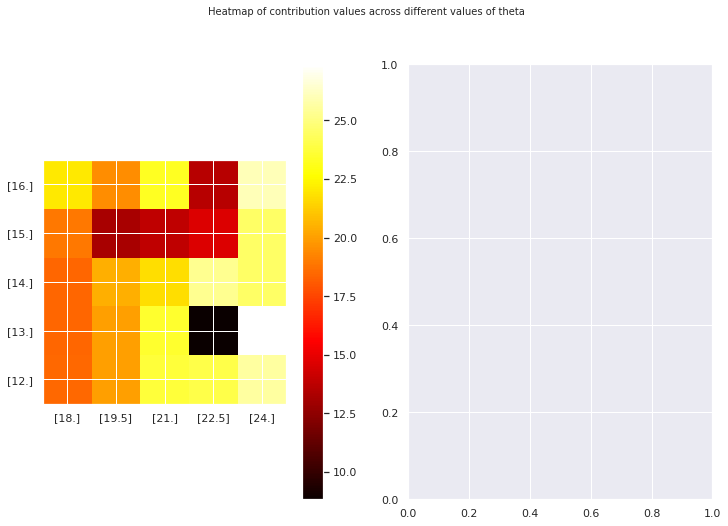

In [81]:
P.plot_heat_map_many(cum_avg_contrib, grid_search_theta_values[1], grid_search_theta_values[2], printIterations)

In [82]:
type(cum_avg_contrib)

numpy.ndarray

In [83]:
grid_search_theta_values[1]

array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

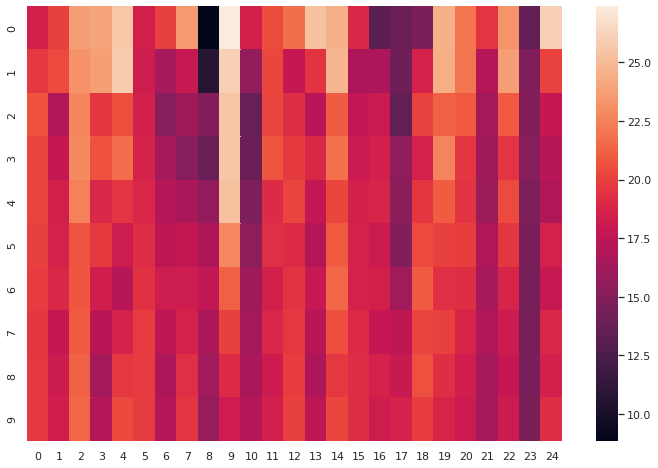

In [87]:
ax = sns.heatmap(cum_avg_contrib)

In [88]:
len(cum_avg_contrib)

10